In [1]:
# Importe les librairies utiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chemin vers les csv
pathTest = "./test3.csv"
pathTrain = "./train3.csv"

# Importe les jeux de donnees
df_test = pd.read_csv(pathTest, sep=',', index_col=0)
df_train = pd.read_csv(pathTrain, sep=',', index_col=0)

In [2]:
"""

--- Variables Explicatives ---
Name : Nom du jeu
Platform : Console sur laquelle le jeu fonctionne
Year of release : Année de sortie du jeu
Genre
Publisher
JP_sales : Nombre de ventes du jeu au Japon en millions d’unités
Other sales : Nombre de ventes du jeu ailleurs dans le monde : Afrique, Asie sans le Japon, Europe sans l’Union Européenne et Amérique du Sud en millions d’unités
Critic_score : Score donné par Metacritic
Critic_count : Nombre de critiques prises en compte pour estimer le Critic_score
User_Score : Score donné par les usagers de Metacritic
User_Count : Nombre d’usagers considérés pour estimer le User_Score
Developer : Compagnie créatrice du jeu
Rating : Classement ESRB (Entertainment Software Rating Board) ie à qui s’addresse le jeu (tout public, majeur, adolescents, etc) 

--- Variable d'interet ---
NA_sales : Nombre de ventes du jeu en Amérique du Nord en millions d’unités
Global_Sales : Nombre de ventes total du jeu en millions d’unités

"""


"\n\n--- Variables Explicatives ---\nName : Nom du jeu\nPlatform : Console sur laquelle le jeu fonctionne\nYear of release : Année de sortie du jeu\nGenre\nPublisher\nJP_sales : Nombre de ventes du jeu au Japon en millions d’unités\nOther sales : Nombre de ventes du jeu ailleurs dans le monde : Afrique, Asie sans le Japon, Europe sans l’Union Européenne et Amérique du Sud en millions d’unités\nCritic_score : Score donné par Metacritic\nCritic_count : Nombre de critiques prises en compte pour estimer le Critic_score\nUser_Score : Score donné par les usagers de Metacritic\nUser_Count : Nombre d’usagers considérés pour estimer le User_Score\nDeveloper : Compagnie créatrice du jeu\nRating : Classement ESRB (Entertainment Software Rating Board) ie à qui s’addresse le jeu (tout public, majeur, adolescents, etc) \n\n--- Variable d'interet ---\nNA_sales : Nombre de ventes du jeu en Amérique du Nord en millions d’unités\nGlobal_Sales : Nombre de ventes total du jeu en millions d’unités\n\n"

In [3]:
"""
--- Evaluation des predictions --- 

Dans le document MTH3302_CriteresProjet-1.pdf on nous informe que la precision
de nos estimations sera evaluee avec le root mean square error (RMSE)

On definit cette fonction ci-bas,

    Y : Variable d'interet
    W : Predictions

"""

def RMSE(Y,W):
    
    # Nombre d'observations
    n = len(Y)
    
    total = 0.0
    for i in range(n):
        total += (Y[i] - W[i])**2
    
    mean = total/float(n)
    
    print("RMSE = %.2f" % (mean))
    

In [4]:
"""
--- Variable Qualitative -> Table Binaire --- 

Afin de traiter nos variables qualitatives, nous les transformons en table binaire.
Nous nous basons sur la fonction get_dummies de la librairies Panda pour arriver a nos fins.

Input,
    trainSet : le dataframe complet contenant le jeu de donnees de training avec toutes ses colonnes
    testSet : le dataframe complet contenant le jeu de donnees de training avec toutes ses colonnes
    trainVar : la variable qualitative que nous souhaitons transformer en tableau de variable binaire
    testVar : la variable qualitative que nous souhaitons transformer en tableau de variable binaire

"""

def binerizedQualitativeVariable(trainSet, testSet, trainVar, testVar):
    
    # Generate Binary Table
    trainVar_binary = pd.get_dummies(trainVar)
    testVar_binary = pd.get_dummies(testVar)

    # We concatenate the new columns
    trainSet = pd.concat([trainSet,pd.DataFrame(trainVar_binary)],axis=1)
    testSet = pd.concat([testSet,pd.DataFrame(testVar_binary)],axis=1)

    # Get missing columns in the test set
    missing_categories = set(trainSet) - set(testSet)

    # Add the missing columns in test set with default value equal to 0
    for c in missing_categories:
        testSet[c] = 0

    # Get missing columns in the train set
    missing_categories = set(testSet) - set(trainSet)

    # Add the missing columns in train set with default value equal to 0
    for c in missing_categories:
        trainSet[c] = 0

    # Ensure the order of columns in the test and train sets are the same
    trainSet, testSet = trainSet.align(testSet, axis=1)
    
    # We return the two set
    return trainSet, testSet

In [5]:
# Separons les variables explicatives qualitatives de celles quantitatives
df_train_quanti = df_train.drop(['Name','Platform','Genre','Publisher','Developer','Rating'], axis=1)
df_test_quanti = df_test.drop(['Platform','Genre','Publisher','Developer','Rating'], axis=1)


In [6]:
# Variable Qualitative #1 : Platform
print("Nbr. of categories (train) : %d" %(df_train.Platform.nunique()))
print("Nbr. of categories (test) : %d" %(df_test.Platform.nunique()))

df_train_quanti, df_test_quanti = binerizedQualitativeVariable(df_train_quanti, df_test_quanti, df_train.Platform, df_test.Platform)

Nbr. of categories (train) : 30
Nbr. of categories (test) : 27


In [7]:
# Variable Qualitative #2 : Genre
print("Nbr. of categories (train) : %d" %(df_train.Genre.nunique()))
print("Nbr. of categories (test) : %d" %(df_test.Genre.nunique()))

df_train_quanti, df_test_quanti = binerizedQualitativeVariable(df_train_quanti, df_test_quanti, df_train.Genre, df_test.Genre)

Nbr. of categories (train) : 12
Nbr. of categories (test) : 12


In [8]:
# Variable Qualitative #3 : Publisher
print("Nbr. of categories (train) : %d" %(df_train.Publisher.nunique()))
print("Nbr. of categories (test) : %d" %(df_test.Publisher.nunique()))

df_train_quanti, df_test_quanti = binerizedQualitativeVariable(df_train_quanti, df_test_quanti, df_train.Publisher, df_test.Publisher)

Nbr. of categories (train) : 552
Nbr. of categories (test) : 280


In [9]:
# Variable Qualitative #4 : Developer
print("Nbr. of categories (train) : %d" %(df_train.Developer.nunique()))
print("Nbr. of categories (test) : %d" %(df_test.Developer.nunique()))

"""
Bon ici on a un probleme, si on ajoute les colonnes binaires generees par cette variable on ajoute 100mb
a notre csv. Ceci rend peu pratique le prototypage, pour l'instant on le laisse tomber. On essayera de ce
donner une raison rationnelle de le domper plus tard dans l'analyse. Hypothese, beaucoup de colinearite avec 
le Publisher.
"""
df_train_quanti, df_test_quanti = binerizedQualitativeVariable(df_train_quanti, df_test_quanti, df_train.Developer, df_test.Developer)

Nbr. of categories (train) : 1593
Nbr. of categories (test) : 677


In [10]:
# Variable Qualitative #5 : Rating
print("Nbr. of categories (train) : %d" %(df_train.Rating.nunique()))
print("Nbr. of categories (test) : %d" %(df_test.Rating.nunique()))

df_train_quanti, df_test_quanti = binerizedQualitativeVariable(df_train_quanti, df_test_quanti, df_train.Rating, df_test.Rating)

Nbr. of categories (train) : 8
Nbr. of categories (test) : 5


In [11]:
# On regarde le nombre de NaN par variables explicatives
print("Nombre de NaN sur %d observations \n" % (len(df_train_quanti)))
print(df_train_quanti.isna().sum())

# On garde seulement les observations ou nous avons toutes les donnees (a ameliorer plus tard)
df_train_quanti = df_train_quanti.dropna()

# On calcule le nombre d'observations restantes
print("\nApres clean-up, nombre d'observation : %d" % (len(df_train_quanti)))

Nombre de NaN sur 14094 observations 

10TACLE Studios                          0
10tacle Studios                          0
10tacle Studios- Fusionsphere Systems    0
1C Company                               0
1C- 1C Company                           0
1C- Ino-Co- 1C Company                   0
1C- Various- 1C Company                  0
1C: Maddox Games                         0
1C:Ino-Co                                0
1st Playable Productions                 0
2015- Inc                                0
20th Century Fox Video Games             0
2600                                     0
2D Boy                                   0
2D Boy                                   0
2D Boy                                   0
2D Boy                                   0
2K Australia                             0
2K Czech                                 0
2K Games                                 0
2K Marin                                 0
2K Play                                  0
2K Shanghai    

In [12]:
# On enleve les colonnes qui ne comportent que des zeros
cols_only0 = (df_train_quanti != 0).any(axis=0)
df_train_quanti = df_train_quanti.loc[:,cols_only0]
df_test_quanti = df_test_quanti.loc[:,cols_only0]

# On enleve toutes les colonnes qui sont en double
duplicates = df_train_quanti.T.duplicated()
duplicates = ~duplicates
df_train_quanti = df_train_quanti.T[duplicates].T
df_test_quanti = df_test_quanti.T[duplicates].T


In [13]:
# On sauvegarde nos deux nouveaux jeux de donnees entierement quantitatif
#df_train_quanti.to_csv("train_quanti.csv")
#df_test_quanti.to_csv("test_quanti.csv")

In [14]:
def linear_regression(y,x):
    
    # Number of Explicative Variables
    k = 0
    try:
        k = x.shape[1]
    except IndexError:
        k = 1
        
    
    # The variance-covariance
    C = np.linalg.inv(np.dot(x.T,x))
    
    B = np.dot(np.dot(C,x.T),y)
    
    return B, np.dot(x,B)

In [15]:
def R2_adj(Y,W,p):

    SS_tot = 0.0
    SS_reg = 0.0
    SS_res = 0.0    
    
    y_S = np.sum(Y)/len(Y)

    for i in range(len(Y)):
        SS_tot += (Y[i] - y_S)**2
        SS_reg += (W[i] - y_S)**2
        SS_res += (Y[i] - W[i])**2
        
    
    n = len(Y)
    
    Radj = 1 - ((SS_res)/float(n-p))/((SS_tot)/(n-1))

    return Radj

In [16]:
# On definit notre variable d'interet
Y = np.array(df_train_quanti.NA_Sales)

# On definit notre vecteur de variables explicatives
X = np.array(df_train_quanti.drop(['NA_Sales','Global_Sales'], axis=1))
nbrOfVar = X.shape[1]

In [17]:
# On s'assure que nos matrices soient toutes dans la bonne position
print("Y Shape : ",Y.shape)
print("X Shape : ",X.shape)
print("Nbr de Variables : ",nbrOfVar)

Y Shape :  (5857,)
X Shape :  (5857, 1467)
Nbr de Variables :  1467


In [18]:
# On effectue notre regression lineaire
try:
    b, data = linear_regression(Y,X)
    RMSE(Y,data)
    print("R2_adj : %.2f" %(R2_adj(Y,data,nbrOfVar)))
except np.linalg.LinAlgError:
    print("NUL, hahaha determinant = 0")

RMSE = 380741.73
R2_adj : -524762.34


In [19]:
# The Mean Matrix
u = np.mean(X, axis=0)

# The Variance Matrix
v = np.std(X, axis=0)

# The Normalized X matrix
X_std = (X-u)/v

# The covariance matrix
E = np.dot(X_std.T,X_std)/(nbrOfVar-1)

# Eigenvalues and Eigenvectors
eig_val, eig_vec = np.linalg.eig(E) #vector already normalized

eig_val = eig_val.real # Remove imaginary part

eig_val_contribution = eig_val/np.sum(eig_val) # Extract the explained variable for each eigenvalues

eig_val_contribution = np.array(([range(nbrOfVar),eig_val_contribution])).T # Concatenate an index column

eig_val_contribution = eig_val_contribution[(-eig_val_contribution[:,1]).argsort()] # Sort in descending order for col[1]

print("Explained variance : ")
sumSofar = 0.0
for i in range(len(eig_val)):
    sumSofar += eig_val_contribution[i,1]
    print("%d. Eig %d = %.4f --- sum : %.4f" % (i+1,eig_val_contribution[i,0],eig_val_contribution[i,1],sumSofar))

Explained variance : 
1. Eig 0 = 0.0026 --- sum : 0.0026
2. Eig 1 = 0.0022 --- sum : 0.0048
3. Eig 2 = 0.0021 --- sum : 0.0069
4. Eig 3 = 0.0020 --- sum : 0.0089
5. Eig 4 = 0.0018 --- sum : 0.0107
6. Eig 5 = 0.0017 --- sum : 0.0124
7. Eig 6 = 0.0016 --- sum : 0.0140
8. Eig 7 = 0.0016 --- sum : 0.0156
9. Eig 8 = 0.0016 --- sum : 0.0172
10. Eig 9 = 0.0015 --- sum : 0.0187
11. Eig 10 = 0.0015 --- sum : 0.0202
12. Eig 13 = 0.0015 --- sum : 0.0217
13. Eig 14 = 0.0014 --- sum : 0.0231
14. Eig 15 = 0.0014 --- sum : 0.0245
15. Eig 16 = 0.0014 --- sum : 0.0260
16. Eig 17 = 0.0014 --- sum : 0.0274
17. Eig 18 = 0.0014 --- sum : 0.0288
18. Eig 19 = 0.0014 --- sum : 0.0301
19. Eig 20 = 0.0014 --- sum : 0.0315
20. Eig 21 = 0.0014 --- sum : 0.0329
21. Eig 22 = 0.0014 --- sum : 0.0343
22. Eig 23 = 0.0014 --- sum : 0.0356
23. Eig 24 = 0.0014 --- sum : 0.0370
24. Eig 25 = 0.0014 --- sum : 0.0384
25. Eig 26 = 0.0014 --- sum : 0.0397
26. Eig 27 = 0.0014 --- sum : 0.0411
27. Eig 28 = 0.0014 --- sum : 0.042

/home/jean-romain/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


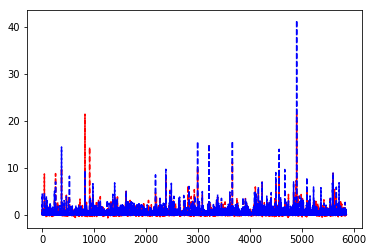

RMSE = 0.29
R2_adj : 0.60


/home/jean-romain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


In [27]:
# Only keep 80% of the explained variance
stopIndex = 1454
indexKept = eig_val_contribution[:stopIndex,0]

# Our reduced regressor
K_vect = eig_vec[indexKept.astype(int)].T

# Our principal components
Z = np.dot(X_std,K_vect)

# Our Regression Coefficiants
B_partial = np.dot(np.linalg.inv(np.dot(Z.T,Z)),Z.T)
B = np.dot(B_partial,Y)

# We add the intercept
Y_new = np.dot(Z,B) + np.mean(Y)

plt.plot(Y_new,"--r",
        Y,"--b")
plt.show()

# New R2 and RMSE
try:
    RMSE(Y,Y_new)
    print("R2_adj : %.2f" %(R2_adj(Y,Y_new,nbrOfVar)))
except np.linalg.LinAlgError:
    print("NUL, hahaha determinant = 0")

In [21]:
"""
# Exemple
X_new = [50-np.mean(df.Age),90-np.mean(df.Weight)]
bp = np.dot(X_new,B) + np.mean(df.BP)
print("Estimated BP : ",bp)
"""

'\n# Exemple\nX_new = [50-np.mean(df.Age),90-np.mean(df.Weight)]\nbp = np.dot(X_new,B) + np.mean(df.BP)\nprint("Estimated BP : ",bp)\n'